# CSC17104 – LẬP TRÌNH KHOA HỌC DỮ LIỆU
# ĐỒ ÁN CUỐI KỲ: **Data Science Salaries 2023**

---

## **GVHD:** Phạm Trọng Nghĩa - Lê Nhựt Nam - Nguyễn Thanh Tình

## **Thành viên nhóm:**
- 23122011 - Đoàn Hải Nam
- 23122014 - Hoàng Minh Trung
- 23122036 - Nguyển Ngọc Khoa

---

# **1. Thu thập dữ liệu**

### Chủ đề dữ liệu là gì?
- Bộ dữ liệu nói về mức lương của các vị trí công việc thuộc lĩnh vực Data Science và các lĩnh vực liên quan (Data Analyst, Data Engineer, Machine Learning Engineer, AI Engineer,…). Nó ghi nhận các yếu tố ảnh hưởng đến lương như kinh nghiệm, chức danh, loại hình làm việc, mức độ làm việc từ xa, vị trí công ty và quy mô công ty.
- **Bối cảnh:** Bộ dữ liệu phản ánh thực tế thị trường việc làm Data Science toàn cầu trong giai đoạn 2020–2023, đặc biệt là sự bùng nổ của làm việc từ xa sau đại dịch COVID-19, sự chênh lệch lương mạnh mẽ giữa các khu vực địa lý (đặc biệt Mỹ so với phần còn lại của thế giới), và xu hướng trả lương cao hơn ở các công ty lớn hoặc các vị trí senior/executive.

### Nguồn dữ liệu là gì?
- **Nguồn dữ liệu**: Kaggle – [Data Science Salaries 2023](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023/data)
- **Tác giả gốc**: [randomarnab](https://www.kaggle.com/arnabchaki)
- **Ngày xuất bản**: Được đăng tải trên Kaggle vào năm 2023 (dữ liệu lương trải dài từ 2020 đến 2023).

### Dữ liệu này có được cấp phép để sử dụng không?
- Bố dữ liệu có giấy phép: [Open Data Commons Attribution License v1.0 (ODC-By)](https://opendatacommons.org/licenses/dbcl/1-0/)
- Theo giấy phép, ta hoàn toàn được phép sử dụng cho mục đích học tập, nghiên cứu, thương mại,… miễn là ghi nguồn đầy đủ.

### Dữ liệu này được thu thập như thế nào?
- **Phương pháp thu thập**: Chủ yếu thu thập bằng phương pháp web scraping từ các trang web công khai về lương (như Levels.fyi, Glassdoor, và một số job board khác), có thể kết hợp dữ liệu crowdsourced.
- **Dân số mục tiêu và phương pháp lấy mẫu**: Dân số mục tiêu là những người làm việc trong lĩnh vực data toàn cầu. Phương pháp lấy mẫu là convenience sampling/opportunistic (lấy dữ liệu có sẵn công khai), không phải random sampling.
- **Khoảng thời gian thu thập dữ liệu**: Ghi nhận lương của các năm 2020, 2021, 2022 và 2023.
- **Bất kỳ hạn chế hoặc sai lệch nào đã biết trong quá trình thu thập**:
  - Thiên mạnh về dữ liệu từ Mỹ và các nước phát triển, ít dữ liệu từ châu Á, châu Phi, Mỹ Latinh.
  - Người có lương cao thường sẵn lòng công khai hơn → có khả năng bị bias lên cao (inflated salary).
  - Không có thông tin cá nhân (tuổi, giới tính, dân tộc) để bảo vệ quyền riêng tư.
  - Một số vị trí công việc rất niche hoặc ở công ty nhỏ/startup có thể không xuất hiện.

### Tại sao chọn bộ dữ liệu này?
- Nhóm chúng em đều đang học và định hướng theo ngành Data Science/AI nên rất quan tâm đến thực tế lương thưởng, sự khác biệt giữa các vị trí, ảnh hưởng của làm remote và vị trí địa lý tới thu nhập. Đây là chủ đề rất thực tế và gần gũi với sự nghiệp tương lai của cả nhóm.

- **Dữ liệu này có thể cung cấp những câu hỏi hoặc thông tin chi tiết tiềm năng như:**
  - Mức lương trung bình của Data Scientist là bao nhiêu? Xu hướng tăng lương qua các năm ra sao?
  - Làm remote 100% có thực sự giúp người ở các nước lương thấp tiếp cận mức lương cao hơn không?
  - Chức danh nào (Data Scientist, ML Engineer, Data Engineer,…) có mức lương cao nhất khi cùng level kinh nghiệm?
  - Quy mô công ty (S/M/L) ảnh hưởng thế nào đến lương khi kiểm soát các yếu tố khác?
  - Có thể xây dựng mô hình dự đoán lương dựa trên kinh nghiệm, vị trí, loại hình làm việc không?

In [39]:
# Import các thư viện cần thiết
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import các module từ /src
sys.path.append(os.path.abspath('src'))
from src import data_processing as dp
from src import visualization as vis

# Thiết lập autoreload để tự động tải lại các thay đổi trong /src
%load_ext autoreload
%autoreload 2

# Tải tập dữ liệu
df = dp.load_data('data/raw/ds_salaries.csv')
df.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Đã tải dữ liệu thành công từ data/raw/ds_salaries.csv


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


---

# **2. Khám phá dữ liệu**

## **2.1. Tổng quan về tập dữ liệu**

### **Thông tin cơ bản**
*   Số lượng dòng: 3755
*   Số lượng cột: 11
*   Mỗi dòng đại diện cho một bản ghi mô tả mức lương của một nhân sự làm việc trong lĩnh vực Data Science. Bao gồm các thông tin về **cấp độ kinh nghiệm, loại hợp đồng, chức danh công việc, mức lương (cả tiền gốc và USD), quốc gia cư trú, tỷ lệ làm việc từ xa, quốc gia công ty và quy mô công ty**. Nói cách khác, mỗi dòng là một bản ghi mô tả **mức lương và điều kiện làm việc của một cá nhân cụ thể** trong ngành Data Science.

*   Kích thước tổng thể: ~1.72 MB

In [2]:
print(f"Dữ liệu có: {df.shape[0]} hàng, {df.shape[1]} cột")
print(f"Kích thước tổng thể: {df.memory_usage(deep=True).sum() / 1e6:.2f} MB")

Dữ liệu có: 3755 hàng, 11 cột
Kích thước tổng thể: 1.72 MB


### **Tính toàn vẹn dữ liệu**
*   Số  hàng trùng lặp: 1171
*   Các hàng trống: 0
*   Các hàng trùng lặp **nên được loại bỏ**.

    Tổng cộng 1.171 bản ghi trùng xuất hiện dưới dạng các dòng **giống hệt nhau trên toàn bộ các thuộc tính**, những bản ghi này thực chất mô tả **cùng một quan sát** được ghi nhận nhiều lần và **không mang thêm thông tin mới**.

    Việc giữ những bản ghi này sẽ khiến dataset bị **lệch phân phối**, làm sai kết quả thống kê và gây **overfitting** cho mô hình dự báo. Mặc dù tỷ lệ trùng lặp khá cao (khoảng **31%**), việc loại bỏ chúng là cần thiết để đảm bảo dữ liệu **sạch, không thiên lệch**, và phản ánh chính xác phân bố thực tế.


In [3]:
duplicates = df.duplicated().sum()
print(f"Số hàng trùng lặp: {duplicates}")

empty_rows = df.isnull().all(axis=1).sum()
print(f"Số hàng trống: {empty_rows}")

Số hàng trùng lặp: 1171
Số hàng trống: 0


In [4]:
df = df.drop_duplicates()
print(f"Sau khi loại bỏ các hàng trùng lặp: {df.shape[0]} hàng, {df.shape[1]} cột")

Sau khi loại bỏ các hàng trùng lặp: 2584 hàng, 11 cột


### **Danh sách các cột**

**Thông tin mỗi cột:**

* **work_year**: Năm mà mức lương được trả.
* **experience_level**: Cấp độ kinh nghiệm của nhân viên trong năm làm việc.
* **employment_type**: Loại hình hợp đồng lao động cho vị trí đó.
* **job_title**: Chức danh công việc trong năm được ghi nhận.
* **salary**: Tổng mức lương được trả trước thuế (đơn vị tiền tệ gốc).
* **salary_currency**: Loại tiền tệ được trả lương theo mã ISO 4217.
* **salary_in_usd**: Mức lương đã được quy đổi sang USD.
* **employee_residence**: Quốc gia nơi nhân viên cư trú trong năm làm việc (theo mã ISO 3166).
* **remote_ratio**: Tỷ lệ phần trăm công việc được thực hiện từ xa.
* **company_location**: Quốc gia nơi đặt trụ sở chính hoặc chi nhánh của công ty.
* **company_size**: Quy mô công ty (số lượng nhân viên trung bình trong năm).

**Các cột liên quan đến phân tích tiềm năng:**

**Các cột nên bị loại bỏ**

### **Các kiểu dữ liệu**
*   Kiểu dữ liệu hiện tại của từng cột:

In [5]:
# Kiểm tra kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


Dựa trên **thông tin mỗi cột** thì không có cột nào có kiểu dữ liệu bất thường cần phải chuyển đổi.

## **2.2. Phân tích các cột số (Numerical Columns)**

**Xác định các cột số:**

In [6]:
# Liệt kê các cột phân loại dựa trên dtype object
cat_cols = df.select_dtypes(include=['int64']).columns.tolist()

print("Danh sách các cột số:")
print(cat_cols)

Danh sách các cột số:
['work_year', 'salary', 'salary_in_usd', 'remote_ratio']


### **work_year**

--- Các chỉ số cho: work_year ---

[1] Phân phối & Xu hướng trung tâm:
   - Trung bình: 2022.30
   - Trung vị: 2022.00
   - Độ lệch chuẩn: 0.75
   - Độ lệch: -0.97 (0 = bình thường, >0 = lệch phải, <0 = lệch trái)

[2] Phạm vi & Giá trị ngoại lai:
   - Min: 2020
   - Max: 2023
   - IQR: 1.00 (Q1=2022.00, Q3=2023.00)
   - Ranh giới giá trị ngoại lai: [2020.50, 2024.50]
   - Số lượng giá trị ngoại lai: 75 (2.90%)

[3] Chất lượng dữ liệu:
   - Giá trị bị thiếu: 0 (0.00%)
   - Các giá trị duy nhất (4): [np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
----------------------------------------


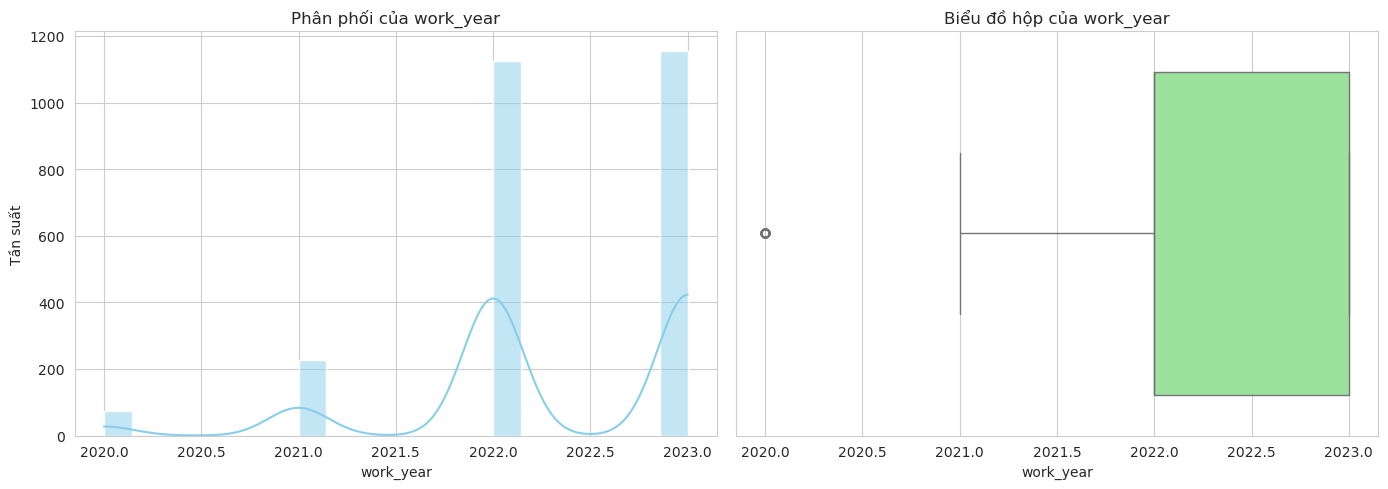

In [7]:
# Phân tích và vẽ biểu đồ work_year
dp.analyze_numerical_column_metrics(df, 'work_year')
vis.plot_column_distribution(df, 'work_year')

**Phân bố dữ liệu:** Dữ liệu **tập trung mạnh vào 2022-2023** (~90% tổng số), trong khi 2020-2021 chỉ chiếm ~10%. Điều này phản ánh cột bị mất cân bằng và nghiêng về thị trường việc làm giai đoạn gần đây.

**Xu hướng:** Số lượng bản ghi **tăng mạnh theo năm** (2020: 75 $\rightarrow$ 2023: 1,150), cho thấy ngành Data Science phát triển nhanh hoặc nguồn dữ liệu được mở rộng.

**Đặc điểm thống kê:**
- **Skewness = -0.97** (lệch trái): xác nhận dữ liệu tập trung ở các năm mới
- **75 outliers (2.90%)**: toàn bộ là dữ liệu năm 2020 do số lượng quá ít

**Chất lượng dữ liệu:** Dữ liệu **sạch và nhất quán** - không có giá trị thiếu và cũng không có giá trị nào bất thường. Chỉ 4 giá trị duy nhất (2020-2023).

### **salary**

--- Các chỉ số cho: salary ---

[1] Phân phối & Xu hướng trung tâm:
   - Trung bình: 210365.30
   - Trung vị: 134630.00
   - Độ lệch chuẩn: 808037.54
   - Độ lệch: 24.09 (0 = bình thường, >0 = lệch phải, <0 = lệch trái)

[2] Phạm vi & Giá trị ngoại lai:
   - Min: 6000
   - Max: 30400000
   - IQR: 92562.50 (Q1=90000.00, Q3=182562.50)
   - Ranh giới giá trị ngoại lai: [-48843.75, 321406.25]
   - Số lượng giá trị ngoại lai: 95 (3.68%)

[3] Chất lượng dữ liệu:
   - Giá trị bị thiếu: 0 (0.00%)
----------------------------------------


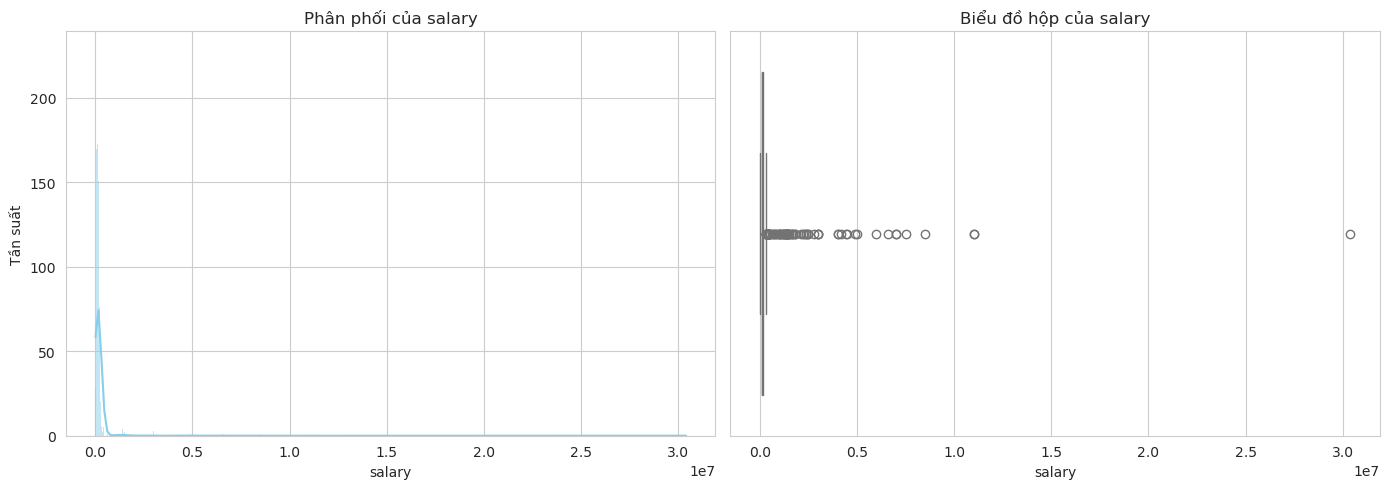

In [8]:
# Analyze and Visualize salary
dp.analyze_numerical_column_metrics(df, 'salary')
vis.plot_column_distribution(df, 'salary')

In [9]:
print("Checking impossible values:")
print(f"salary < 0: {np.sum(df['salary'] < 0)}")

Checking impossible values:
salary < 0: 0


**Phân bố dữ liệu:**
Dữ liệu có **phân bố lệch phải cực mạnh** (skewness = 24.09), tập trung chủ yếu ở khoảng **dưới 500K**, trong khi có một số ít giá trị cực cao (lên đến 30.4M). Đây là đặc trưng điển hình của dữ liệu lương.

**Xu hướng trung tâm:**

* **Mean (210K) >> Median (134K)**: chênh lệch lớn do outliers kéo trung bình lên cao
* **Median = 134K** phản ánh mức lương "điển hình" chính xác hơn
* **Độ phân tán rất cao** (Std Dev = 808K): mức lương có sự chênh lệch lớn giữa các vị trí/công ty

**Khoảng giá trị & Outliers:**

* **Khoảng lương**: 6K - 30.4M (chênh lệch ~5,000 lần!)
* **95 outliers (3.68%)**: các mức lương > 321K, có thể là C-level, vai trò đặc biệt hoặc **lỗi dữ liệu** (30.4M là bất thường)
* **IQR = 92.5K** (Q1=90K, Q3=182.5K): 50% dữ liệu nằm trong khoảng hẹp này

**Chất lượng dữ liệu:**

* **Không có giá trị thiếu** và không có lương âm
* **Cần kiểm tra outliers**: giá trị 30.4M có thể là lỗi nhập liệu (nhầm đơn vị tiền tệ, thêm số 0)

**Khuyến nghị**

* **Sử dụng Median** thay vì Mean cho phân tích tổng quan
* **Xử lý outliers**: xem xét loại bỏ hoặc điều tra các giá trị > 1M
* **Phân tích theo nhóm**: phân chia theo experience_level, job_title để hiểu rõ sự chênh lệch
* **Chuẩn hóa dữ liệu**: xem xét log transformation để phân tích mô hình

### **salary_in_usd**

--- Các chỉ số cho: salary_in_usd ---

[1] Phân phối & Xu hướng trung tâm:
   - Trung bình: 133409.28
   - Trung vị: 130000.00
   - Độ lệch chuẩn: 67136.84
   - Độ lệch: 0.62 (0 = bình thường, >0 = lệch phải, <0 = lệch trái)

[2] Phạm vi & Giá trị ngoại lai:
   - Min: 5132
   - Max: 450000
   - IQR: 90025.00 (Q1=84975.00, Q3=175000.00)
   - Ranh giới giá trị ngoại lai: [-50062.50, 310037.50]
   - Số lượng giá trị ngoại lai: 29 (1.12%)

[3] Chất lượng dữ liệu:
   - Giá trị bị thiếu: 0 (0.00%)
----------------------------------------


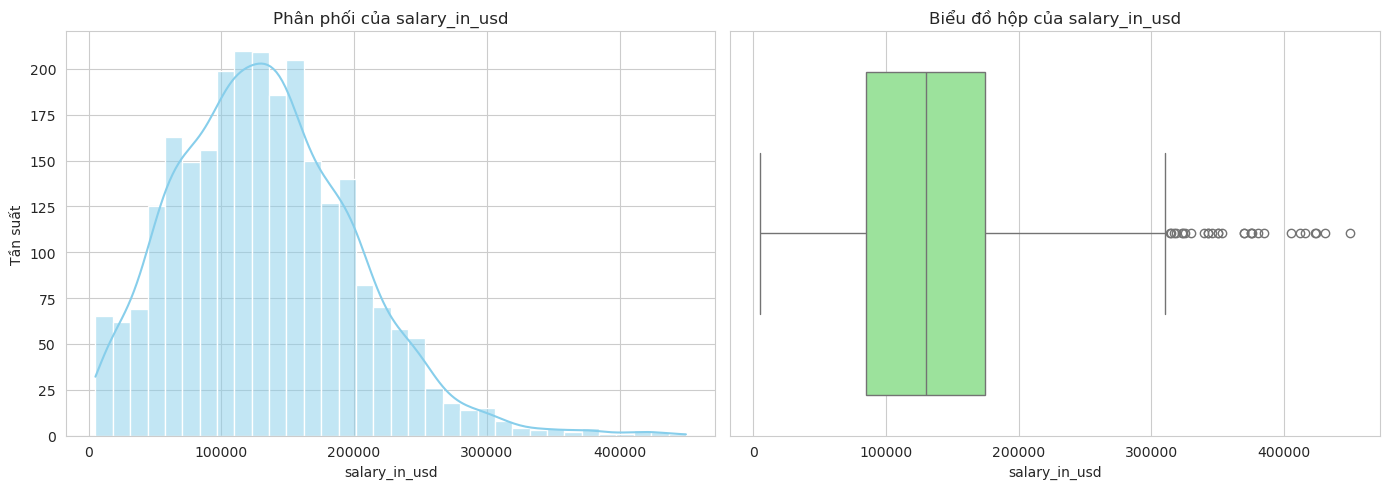

In [10]:
# Analyze and Visualize salary_in_usd
dp.analyze_numerical_column_metrics(df, 'salary_in_usd')
vis.plot_column_distribution(df, 'salary_in_usd')

In [11]:
print("Checking impossible values:")
print(f"salary_in_usd < 0: {np.sum(df['salary_in_usd'] < 0)}")

Checking impossible values:
salary_in_usd < 0: 0


**Phân bố dữ liệu:**
Dữ liệu có **phân bố gần chuẩn với lệch phải nhẹ** (skewness = 0.62), tập trung chủ yếu ở khoảng **100K-200K USD**. Đây là phân bố **hợp lý và đại diện** cho thị trường lương Data Science toàn cầu.

**Xu hướng trung tâm:**

* **Mean (133K) ≈ Median (130K)**: chênh lệch nhỏ cho thấy dữ liệu cân đối hơn nhiều so với cột `salary` gốc
* **Std Dev = 67K**: độ biến động vừa phải, phản ánh sự chênh lệch tự nhiên theo kinh nghiệm và vị trí
* Mức lương trung bình **130K USD** là con số thực tế cho ngành Data Science

**Khoảng giá trị & Outliers:**

* **Khoảng lương**: 5K - 450K (khoảng hợp lý hơn nhiều so với cột `salary`)
* **Chỉ 29 outliers (1.12%)**: giảm đáng kể từ 3.68%, cho thấy việc quy đổi USD đã **chuẩn hóa tốt** dữ liệu
* **IQR = 90K** (Q1=85K, Q3=175K): 50% dữ liệu nằm trong khoảng hợp lý

**So sánh với cột salary:**

* **Phân bố ổn định hơn**: skewness giảm từ 24.09 xuống 0.62
* **Ít outliers hơn**: từ 95 xuống 29 điểm
* **Loại bỏ nhiễu tiền tệ**: không còn giá trị bất thường như 30.4M

**Chất lượng dữ liệu:**

* **Không có giá trị thiếu** và không có lương âm
* **Dữ liệu đã được làm sạch tốt** thông qua quy đổi USD

### **remote_ratio**

--- Các chỉ số cho: remote_ratio ---

[1] Phân phối & Xu hướng trung tâm:
   - Trung bình: 50.48
   - Trung vị: 50.00
   - Độ lệch chuẩn: 48.16
   - Độ lệch: -0.02 (0 = bình thường, >0 = lệch phải, <0 = lệch trái)

[2] Phạm vi & Giá trị ngoại lai:
   - Min: 0
   - Max: 100
   - IQR: 100.00 (Q1=0.00, Q3=100.00)
   - Ranh giới giá trị ngoại lai: [-150.00, 250.00]
   - Số lượng giá trị ngoại lai: 0 (0.00%)

[3] Chất lượng dữ liệu:
   - Giá trị bị thiếu: 0 (0.00%)
   - Các giá trị duy nhất (3): [np.int64(0), np.int64(50), np.int64(100)]
----------------------------------------


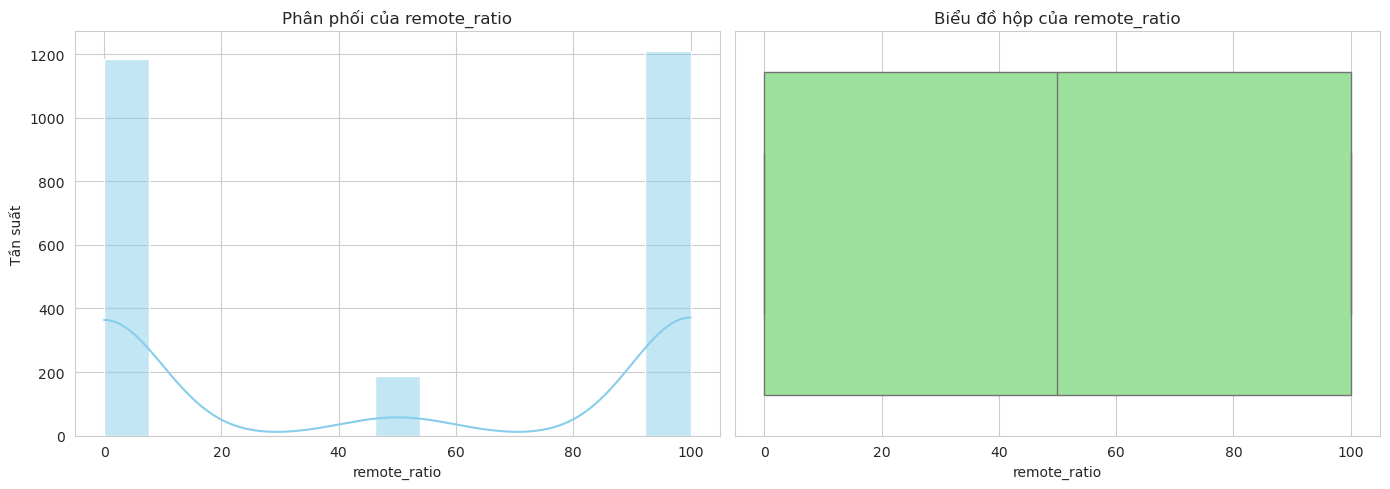

In [12]:
# Analyze and Visualize remote_ratio
dp.analyze_numerical_column_metrics(df, 'remote_ratio')
vis.plot_column_distribution(df, 'remote_ratio')

**Phân bố dữ liệu**
Dữ liệu có **phân bố hai cực (bimodal)** với 3 giá trị duy nhất: **0, 50, 100**. Tập trung chủ yếu ở hai đầu cực (0% và 100% remote), trong khi 50% chiếm tỷ lệ thấp hơn nhiều.

**Đặc điểm phân bố**

* **Skewness ≈ 0** (-0.02): phân bố gần như đối xứng hoàn hảo
* **Mean = Median = 50**: xác nhận tính đối xứng, nhưng **không phản ánh xu hướng thực tế** do dữ liệu tập trung ở hai cực
* **IQR = 100** (Q1=0, Q3=100): 50% dữ liệu nằm ở hai biên, cho thấy **phân hóa rõ rệt** giữa onsite và remote

**Xu hướng làm việc**
Biểu đồ cho thấy thị trường **phân hóa mạnh**:

* **~1,200 công việc 100% remote**: xu hướng làm việc từ xa phổ biến
* **~1,180 công việc 0% remote**: vẫn có nhu cầu cao làm việc tại văn phòng
* **~200 công việc hybrid (50%)**: mô hình kết hợp ít phổ biến hơn

**Chất lượng dữ liệu**

* **Không có giá trị thiếu** và không có outliers
* **Dữ liệu rời rạc**: chỉ 3 giá trị (0, 50, 100) - phù hợp với cách phân loại thực tế
* **Khoảng hợp lý**: từ 0-100

## **2.3. Phân tích các cột phân loại (Categorical Columns)**


**Xác định danh sách các cột phân loại dựa trên kiểu dữ liệu:**

In [13]:
# Liệt kê các cột phân loại dựa trên dtype object
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Danh sách các cột phân loại:")
print(cat_cols)


Danh sách các cột phân loại:
['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']


### **experience_level**

Phân tích cột: experience_level
Số lượng giá trị khác nhau: 4

Value counts:
experience_level
SE    1554
MI     664
EN     270
EX      96
Name: count, dtype: int64 



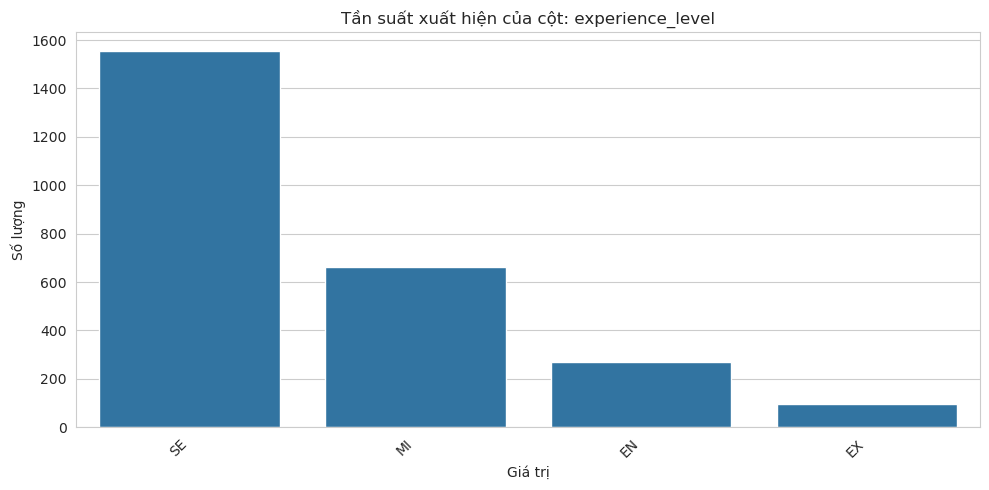

In [14]:
dp.analyze_categorical_column(df, 'experience_level')
vis.plot_bar_count(df, 'experience_level')

Có **ít giá trị phân loại** → thuộc nhóm **low-cardinality** dễ xử lý và thuận lợi cho trực quan hóa.
Phân phối cấp độ kinh nghiệm cho thấy:
- **SE (Senior)** chiếm áp đảo với 2,516 mẫu.
- **MI (Mid-level)** đứng thứ hai với 805 mẫu.
- **EN (Entry)** chỉ chiếm 320 mẫu.
- **EX (Executive)** là nhóm hiếm, chỉ 114 mẫu.

Điều này phản ánh rằng dataset thiên nhiều về các vị trí senior, điều có thể ảnh hưởng đến phân tích mức lương chung (salary skewness).  
Nhóm EX quá ít, có thể xem xét gom nhóm khi mô hình hóa.

### **employment_type**

Phân tích cột: employment_type
Số lượng giá trị khác nhau: 4

Value counts:
employment_type
FT    2547
PT      17
CT      10
FL      10
Name: count, dtype: int64 



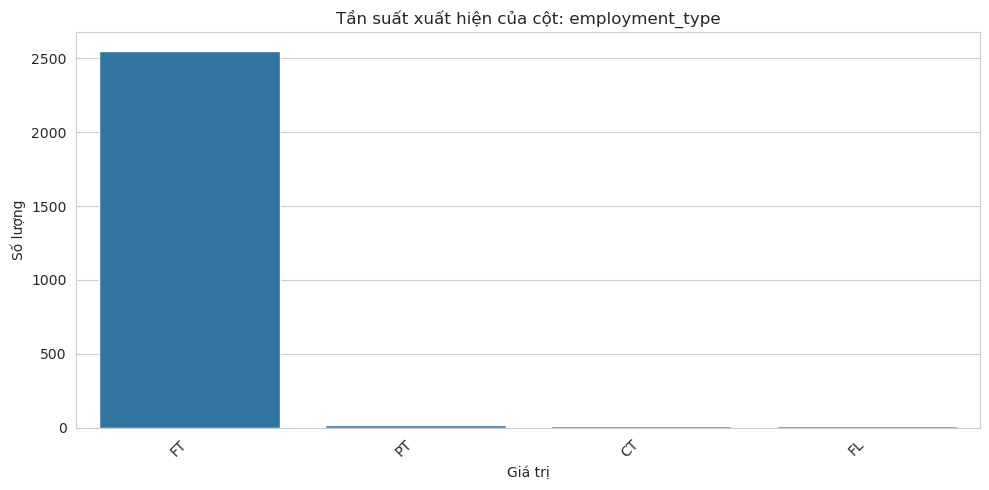

In [15]:
dp.analyze_categorical_column(df, 'employment_type')
vis.plot_bar_count(df, 'employment_type')

Có **ít giá trị phân loại** → thuộc nhóm **low-cardinality**

Tần suất loại hợp đồng:
- **FT – Full-time** chiếm gần như toàn bộ (3,718 mẫu) → >97%.
- Các loại PT (part-time), CT (contract), FL (freelance) cực kỳ ít.

Điều này có nghĩa là:
- Phân tích dựa trên loại hợp đồng sẽ không có nhiều ý nghĩa vì dữ liệu lệch mạnh.
- Khi trực quan hóa, có thể nên hiển thị FT và gom các loại khác thành “Other”.

### **job_title**

Phân tích cột: job_title
Số lượng giá trị khác nhau: 93

Value counts:
job_title
Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Principal Data Architect       1
Head of Machine Learning       1
Cloud Data Architect           1
Staff Data Scientist           1
Finance Data Analyst           1
Name: count, Length: 93, dtype: int64 



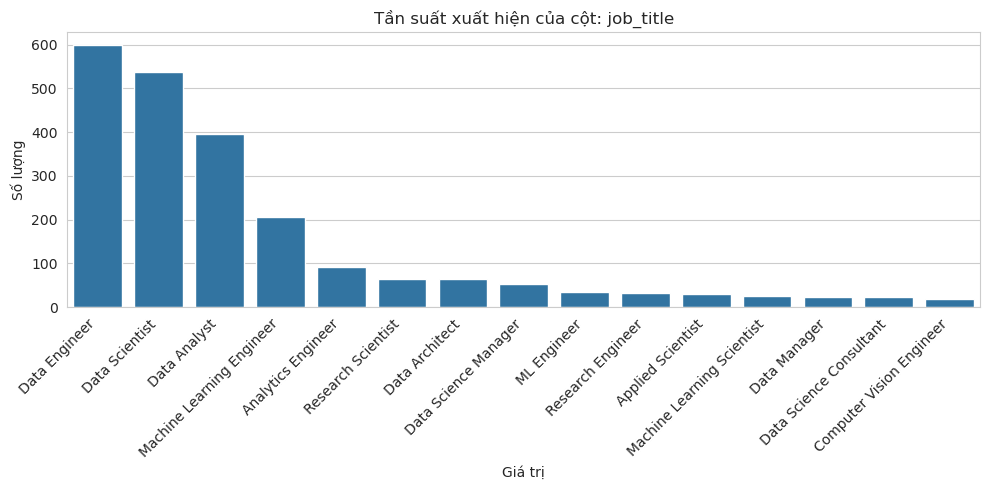

In [16]:
dp.analyze_categorical_column(df, 'job_title')
vis.plot_bar_count(df, 'job_title')

Có **93 giá trị**, là cột có độ đa dạng cao nhất. Việc trực quan tất cả job title có thể gây nhiễu, nên cần giới hạn theo nhóm phổ biến nhất.
Sự phân bố rất lệch:
- 3 vị trí phổ biến nhất:
  - Data Engineer – 1,040 mẫu  
  - Data Scientist – 840 mẫu  
  - Data Analyst – 612 mẫu  
- Phần lớn job title còn lại chỉ có vài mẫu, thậm chí chỉ **1 mẫu**.

Kết luận:
- Đây là một biến **high-cardinality**.
- Trực quan hóa toàn bộ là không khả thi.
- Trong EDA, nên chọn **top 10 hoặc top 15 job titles** để phân tích sâu hơn.
- Khi mô hình hóa, có thể cần chuẩn hóa hoặc gom nhóm theo category lớn (ví dụ: "Data Analyst roles", "Engineer roles").

### **salary_currency**

Phân tích cột: salary_currency
Số lượng giá trị khác nhau: 20

Value counts:
salary_currency
USD    2107
EUR     200
GBP     144
INR      59
CAD      25
AUD       9
BRL       6
SGD       6
PLN       5
CHF       4
TRY       3
HUF       3
DKK       3
JPY       3
THB       2
HKD       1
ILS       1
CZK       1
MXN       1
CLP       1
Name: count, dtype: int64 



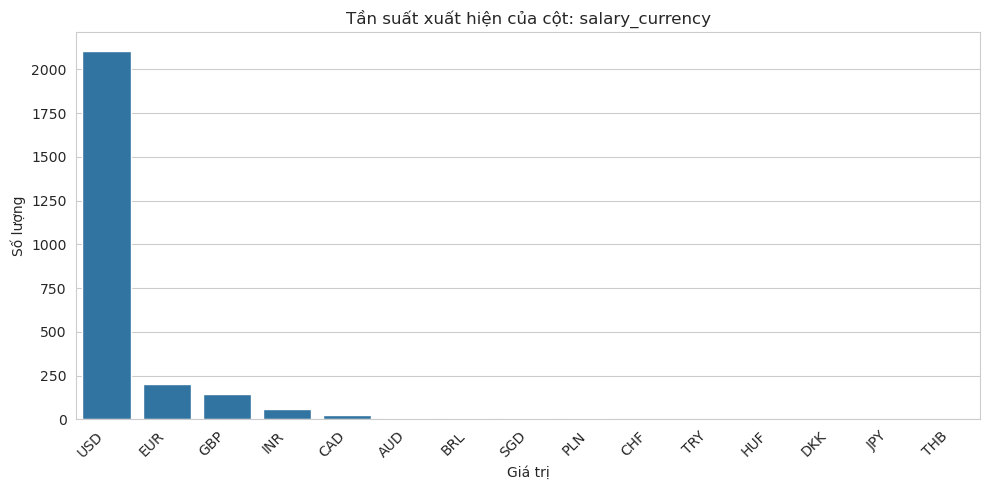

In [17]:
dp.analyze_categorical_column(df, 'salary_currency')
vis.plot_bar_count(df, 'salary_currency')

Có mức độ đa dạng trung bình (20 giá trị). 
    
Loại tiền tệ:
- **USD chiếm 3,224 mẫu** (áp đảo).
- EUR, GBP là hai nhóm lớn tiếp theo.
- Các currency khác chỉ xuất hiện vài lần.

Vấn đề EDA:
- Không cần phân tích sâu vì ta đã có cột `salary_in_usd`.
- Dữ liệu currency skew → không thích hợp cho biểu đồ bar full.

### **employee_residence & company_location**

Phân tích cột: employee_residence
Số lượng giá trị khác nhau: 78

Value counts:
employee_residence
US    1893
GB     150
CA      81
IN      70
DE      47
      ... 
RS       1
NZ       1
MD       1
LU       1
MT       1
Name: count, Length: 78, dtype: int64 



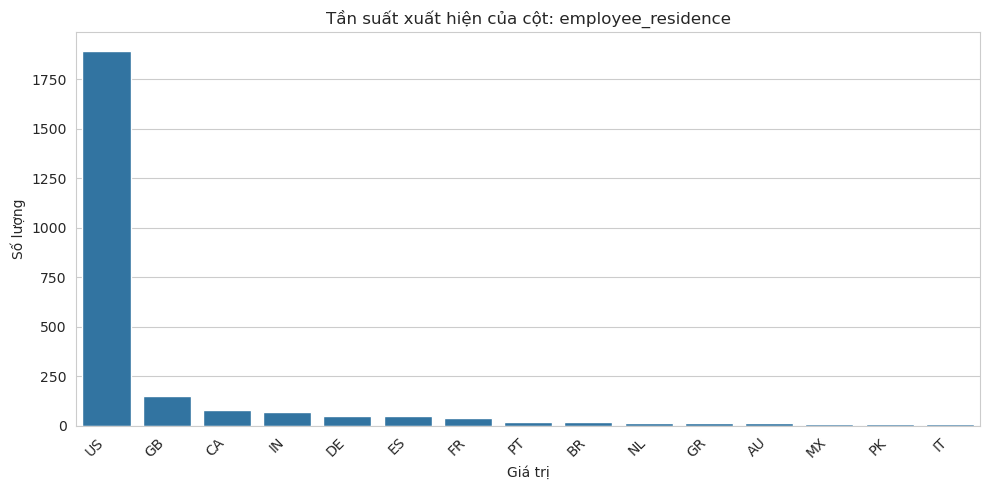

In [18]:
dp.analyze_categorical_column(df, 'employee_residence')
vis.plot_bar_count(df, 'employee_residence')

Phân tích cột: company_location
Số lượng giá trị khác nhau: 72

Value counts:
company_location
US    1929
GB     155
CA      83
IN      57
DE      55
      ... 
CN       1
NZ       1
CL       1
MD       1
MT       1
Name: count, Length: 72, dtype: int64 



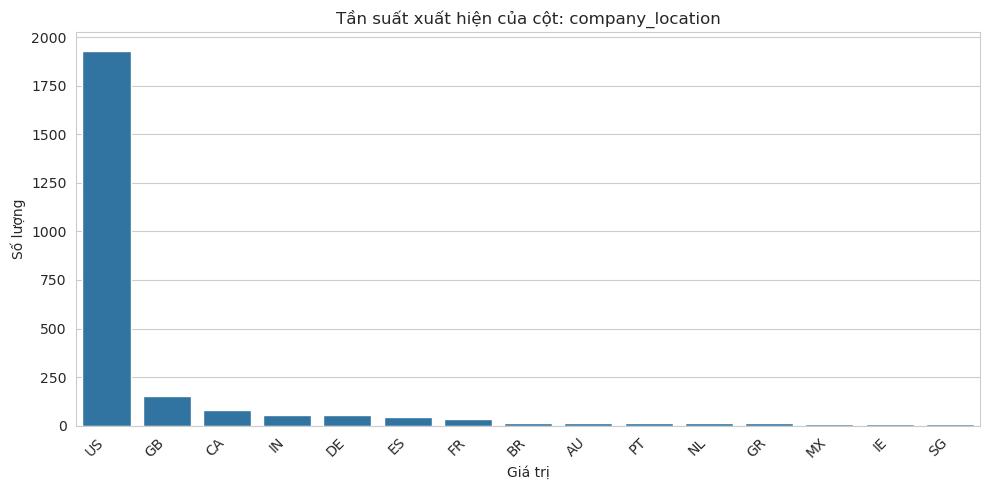

In [19]:
dp.analyze_categorical_column(df, 'company_location')
vis.plot_bar_count(df, 'company_location')

Đều có lượng phân loại rất cao:
- 78 quốc gia cư trú  
- 72 quốc gia đặt công ty  

Trong cả hai:
- **US chiếm hơn 50% dữ liệu**.
- GB, CA, ES, IN chiếm phần nhỏ.
- Phần lớn quốc gia còn lại chỉ có 1–3 mẫu.

### **company_size**

Phân tích cột: company_size
Số lượng giá trị khác nhau: 3

Value counts:
company_size
M    2028
L     409
S     147
Name: count, dtype: int64 



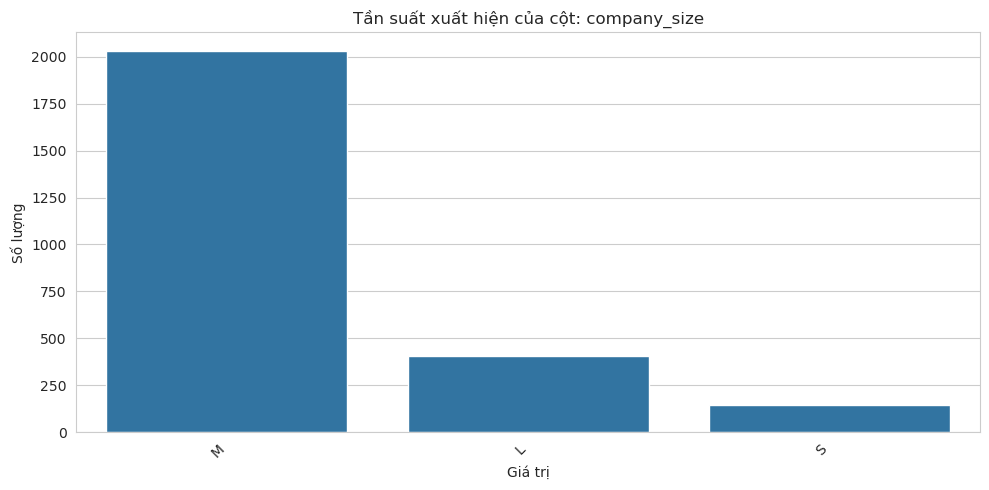

In [20]:
dp.analyze_categorical_column(df, 'company_size')
vis.plot_bar_count(df, 'company_size')

Có **ít giá trị phân loại** → thuộc nhóm **low-cardinality**
Ba phân loại:
- M (medium) → 3,153 mẫu (đa số)
- L (large) → 454 mẫu
- S (small) → 148 mẫu

Rất rõ ràng: phần lớn công ty trong dataset thuộc quy mô trung bình.

### **Tóm tắt:**

- Một số cột có phân phối lệch mạnh (employment_type, company_size).
- Một số cột có cardinality rất cao (job_title, residence, company location).
- EDA tiếp theo nên:
  - Trực quan hóa các biến có cardinality thấp (bar chart trực tiếp).
  - Với các biến có cardinality cao → chỉ dùng **top N**.
  - Kiểm tra quan hệ giữa từng biến và `salary_in_usd`.

Tiếp theo, chúng ta sẽ tạo trực quan hóa để nắm bắt phân phối rõ hơn.

## **2.4. Kiểm tra dữ liệu bất thường**

### **Kiểm tra missing value:**

Với các phân tích từng cột ở trên, ta dễ dàng nhận ra không có dữ liệu bị thiếu. Kiểm tra:

In [21]:
missing_values = df[cat_cols].isnull().sum()
print(missing_values[missing_values > 0] if missing_values.any() else "Không có missing value.")

Không có missing value.


### **Kiểm tra quy đổi currency**

In [22]:
dp.check_currency_rates(df)

=== SUMMARY: Exchange Rate Consistency by Currency ===

HUF  | min_rate=0.002679 | max_rate=0.003296 | diff=23.02% | count=3
PLN  | min_rate=0.224060 | max_rate=0.258873 | diff=15.54% | count=5
GBP  | min_rate=1.215211 | max_rate=1.375467 | diff=13.19% | count=144
EUR  | min_rate=1.050650 | max_rate=1.182058 | diff=12.51% | count=200
INR  | min_rate=0.012158 | max_rate=0.013524 | diff=11.23% | count=59
AUD  | min_rate=0.683180 | max_rate=0.750500 | diff=9.85% | count=9
CAD  | min_rate=0.739327 | max_rate=0.797626 | diff=7.89% | count=25
BRL  | min_rate=0.185359 | max_rate=0.193524 | diff=4.40% | count=6
DKK  | min_rate=0.152987 | max_rate=0.158942 | diff=3.89% | count=3
SGD  | min_rate=0.725078 | max_rate=0.750200 | diff=3.46% | count=6
CHF  | min_rate=1.046963 | max_rate=1.081187 | diff=3.27% | count=4
JPY  | min_rate=0.009102 | max_rate=0.009368 | diff=2.93% | count=3
TRY  | min_rate=0.112061 | max_rate=0.112065 | diff=0.00% | count=3
THB  | min_rate=0.029452 | max_rate=0.029453 | di

(   salary_currency       min       max  count   diff_pct
 10             HUF  0.002679  0.003296      3  23.023072
 15             PLN  0.224060  0.258873      5  15.537234
 8              GBP  1.215211  1.375467    144  13.187521
 7              EUR  1.050650  1.182058    200  12.507276
 12             INR  0.012158  0.013524     59  11.227653
 0              AUD  0.683180  0.750500      9   9.853918
 2              CAD  0.739327  0.797626     25   7.885312
 1              BRL  0.185359  0.193524      6   4.404625
 6              DKK  0.152987  0.158942      3   3.892496
 16             SGD  0.725078  0.750200      6   3.464762
 3              CHF  1.046963  1.081187      4   3.268935
 13             JPY  0.009102  0.009368      3   2.930738
 18             TRY  0.112061  0.112065      3   0.003305
 17             THB  0.029452  0.029453      2   0.002102
 5              CZK  0.042767  0.042767      1   0.000000
 4              CLP  0.001317  0.001317      1   0.000000
 11           

#### Nhận xét về hiện tượng khác biệt tỉ giá và lý do dataset vẫn hợp lệ

Khi kiểm tra tỉ giá thực tế (`salary_in_usd / salary`) theo từng loại tiền tệ, ta thấy rằng nhiều currency như **HUF, PLN, GBP, EUR, INR, AUD, CAD** có độ lệch tỉ giá khá lớn (từ 7% đến hơn 20%). Điều này có thể trông giống như dữ liệu bị sai hoặc quy đổi không chính xác. Tuy nhiên, đây **không phải lỗi của dataset**.

#### Giải thích hiện tượng
Mức độ lệch tỉ giá xảy ra vì dataset:
- được tổng hợp từ **nhiều năm khác nhau**,  
- đến từ **nhiều nguồn khác nhau**,  
- và **mỗi dòng có thể sử dụng tỉ giá theo thời điểm** thay vì một bảng tỉ giá cố định.

Điều này đặc biệt dễ thấy ở các currency có biến động mạnh theo thời gian như **INR, PLN, HUF, JPY**, hoặc các đồng tiền chịu ảnh hưởng tỷ giá thị trường hàng ngày.

Do đó, việc các dòng cùng một currency không sử dụng đúng một tỉ giá duy nhất là **hoàn toàn bình thường** trong bối cảnh dữ liệu thị trường nhân sự quốc tế.

#### Kết luận
- Dataset **không sai**,  
- **không có lỗi quy đổi bất thường**,  
- và **không có dấu hiệu dữ liệu bị nhập sai hoặc bị làm bẩn**.  

Sự khác biệt tỉ giá chỉ phản ánh **tính tự nhiên của dữ liệu thực tế**, nơi tỉ giá thay đổi theo ngày, theo năm và theo nguồn thu thập. Đây là đặc điểm **hợp lý và chấp nhận được** khi làm việc với dữ liệu thị trường toàn cầu.


### **Kiểm tra các giá trị bất thường của cột job_title (có quá nhiều giá trị)**

In [23]:
dp.check_job_title_anomalies(df)

=== Số dòng có dấu hiệu bất thường: 4


,job_title,has_weird_chars,multiple_spaces,all_caps,all_lower,too_short,too_long,contains_number,duplicate_words
2022,3D Computer Vision Researcher,False,False,False,False,False,False,True,False
2149,3D Computer Vision Researcher,False,False,False,False,False,False,True,False
2206,3D Computer Vision Researcher,False,False,False,False,False,False,True,False
3537,3D Computer Vision Researcher,False,False,False,False,False,False,True,False


#### Nhận xét kiểm tra tính bất thường của cột `job_title`

Sau khi chạy các bước kiểm tra định dạng và bất thường trong cột `job_title`, kết quả cho thấy:

- Số dòng có dấu hiệu bất thường: **4**
- Tất cả 4 dòng đều có cùng giá trị: **"3D Computer Vision Researcher"**

Điểm bất thường duy nhất được phát hiện đến từ tiêu chí **chứa số trong job title**. Tuy nhiên, đây không phải lỗi:

#### Giải thích hiện tượng
Các job title như **“3D Computer Vision Researcher”** hoàn toàn hợp lệ trong lĩnh vực ngành dữ liệu – thuật ngữ “3D” mô tả lĩnh vực thị giác máy tính 3 chiều. Do vậy, việc chứa số không mang tính chất “bất thường” hay “sai format”, mà chỉ phản ánh đặc thù của mô tả công việc.

#### Kết luận
- Cột **job_title hoàn toàn sạch**, không tồn tại lỗi ghi nhầm, sai format hay giá trị bất thường.
- 4 dòng bị gắn cờ chỉ **do chứa số**, nhưng đây là **trường hợp hoàn toàn hợp lệ** và có thể bỏ qua trong phân tích thực tế.
- Dataset **ổn định, nhất quán và không có lỗi nghiêm trọng** trong phần job title.



### **Kiểm tra ràng buộc remote_ratio**

In [24]:
anomalies = dp.check_remote_anomalies(df)

=== Số dòng bất thường (khác quốc gia nhưng remote_ratio = 0):  7
      work_year experience_level employment_type             job_title  \
183        2020               EX              FT    Staff Data Analyst   
736        2023               EN              FT         AI Programmer   
974        2022               EX              FT  Data Science Manager   
3621       2021               EN              FT    Research Scientist   
3664       2021               MI              FT         Data Engineer   
3696       2021               MI              FL         Data Engineer   
3705       2021               EN              FT     Big Data Engineer   

      salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
183    15000             USD          15000                 NG             0   
736    70000             USD          70000                 IN             0   
974   106000             USD         106000                 UZ             0   
3621  100000         

#### Phân tích các trường hợp bất thường về `remote_ratio`

Hàm `check_remote_anomalies` đã lọc ra những dòng có **`employee_residence` khác `company_location` nhưng `remote_ratio = 0`**, tức là nhân viên khác quốc gia nhưng vẫn được báo là không làm remote. Đây là các dòng bất thường, vì trong thực tế, nếu nhân viên ở quốc gia khác, thường phải làm remote ít nhất một phần.

#### Đánh giá hiện tượng

1. **Khả năng dữ liệu không chính xác:**  
   - `remote_ratio = 0` nhưng nhân viên ở quốc gia khác với công ty, điều này bất hợp lý. Có thể là do dữ liệu bị nhập sai hoặc thiếu thông tin.

2. **Khả năng hợp lý (ít gặp hơn):**  
   - Một số trường hợp hiếm, ví dụ nhân viên đang làm onsite tạm thời hoặc đi công tác nhưng vẫn được ghi `remote_ratio = 0`.

**Kết luận:** Những dòng này nên được đánh dấu là **bất thường** để xử lý thêm trong EDA hoặc khi xây dựng mô hình, có thể cần chỉnh sửa hoặc loại bỏ để tránh gây nhiễu dữ liệu.


In [25]:
df.drop(index=anomalies.index, inplace=True)

## **2.5. Mối quan hệ & Tương quan**
**Các mẫu sơ bộ:**
*   *Ma trận tương quan / Heatmap*
*   *Các cặp tương quan mạnh*

**Bảng chéo (Cross-tabulations):**
*   *Phân loại vs Phân loại*
*   *Số vs Phân loại (thống kê nhóm)*

**Tương quan giữa các biến số**

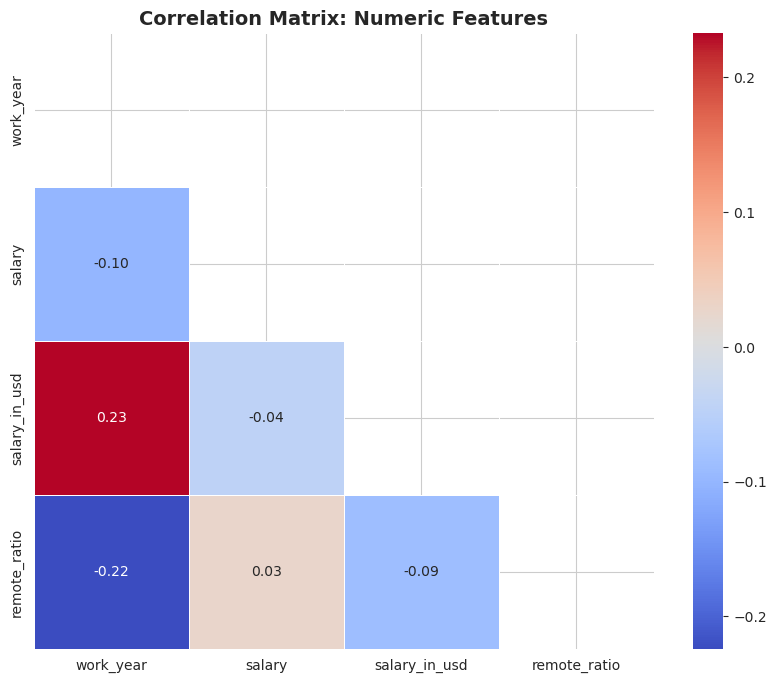

In [26]:
# Tương quan giữa work_year, salary_in_usd, remote_ratio
vis.plot_correlation_heatmap(df, title="Correlation Matrix: Numeric Features")

**Quan hệ giữa Kinh nghiệm (experience_level) và Mức lương (salary_in_usd)**

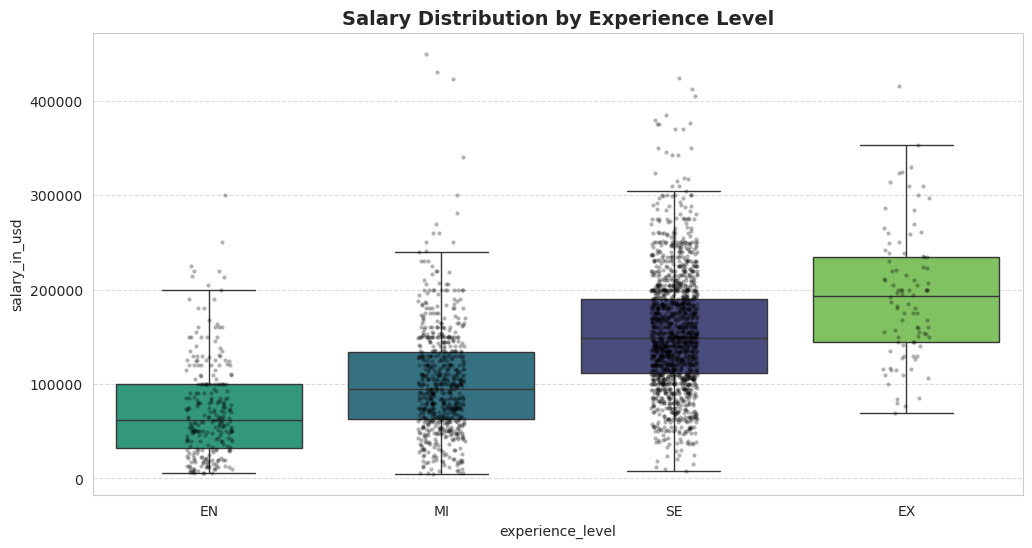

In [27]:
# Thứ tự logic: Entry -> Mid -> Senior -> Executive (EN -> MI -> SE -> EX)
exp_order = ['EN', 'MI', 'SE', 'EX']
vis.plot_categorical_vs_numerical_box(
    df, 
    cat_col='experience_level', 
    num_col='salary_in_usd', 
    order=exp_order,
    title="Salary Distribution by Experience Level"
)

**Quan hệ giữa Quy mô công ty (company_size) và Mức lương (salary_in_usd)**

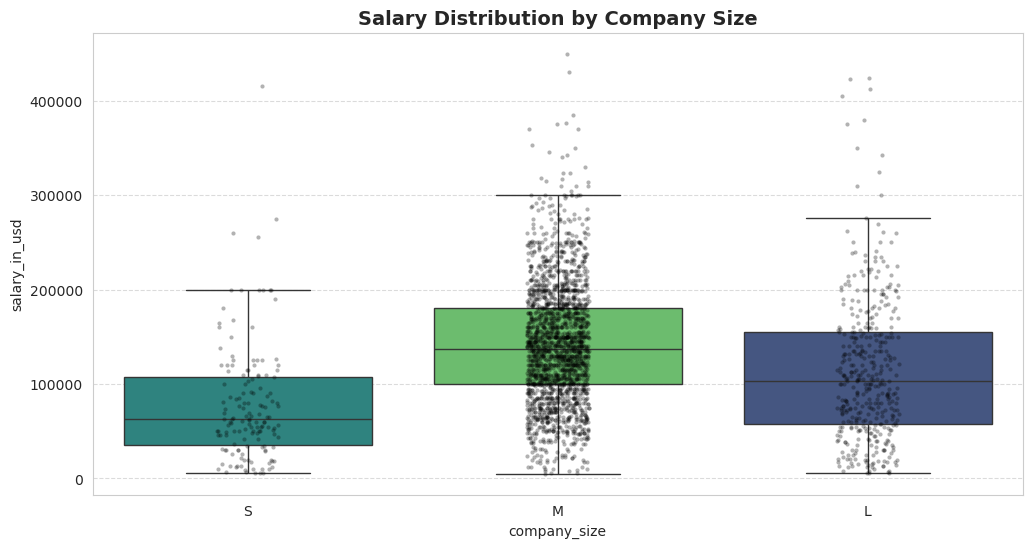

In [28]:
# Thứ tự logic: Small -> Medium -> Large
size_order = ['S', 'M', 'L']
vis.plot_categorical_vs_numerical_box(
    df, 
    cat_col='company_size', 
    num_col='salary_in_usd', 
    order=size_order,
    title="Salary Distribution by Company Size"
)

**Quan hệ giữa Tỷ lệ làm việc từ xa (remote_ratio) và Mức lương (salary_in_usd)**

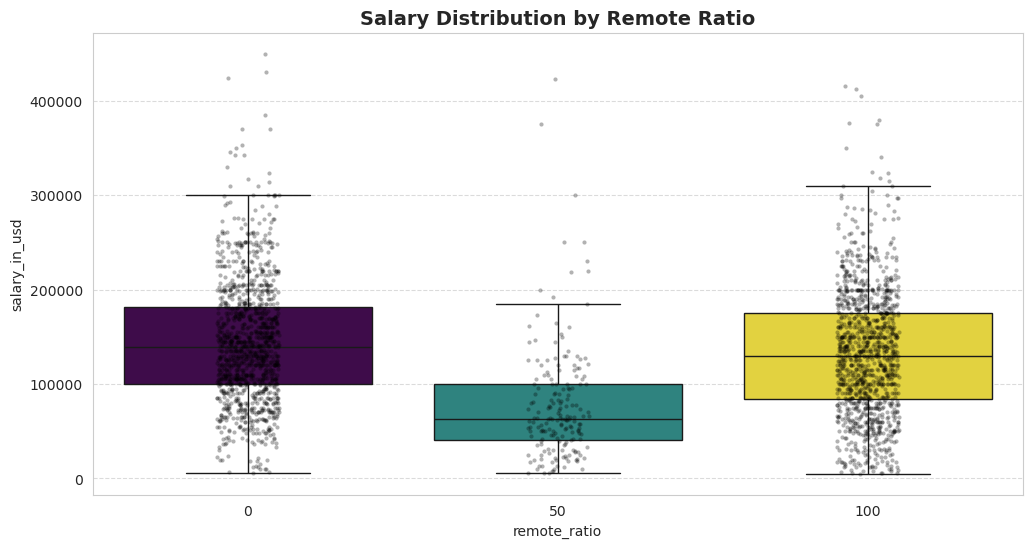

In [29]:
# Remote ratio thực chất là phân loại (0, 50, 100)
vis.plot_categorical_vs_numerical_box(
    df, 
    cat_col='remote_ratio', 
    num_col='salary_in_usd',
    title="Salary Distribution by Remote Ratio"
)

**Quan hệ giữa các biến phân loại**

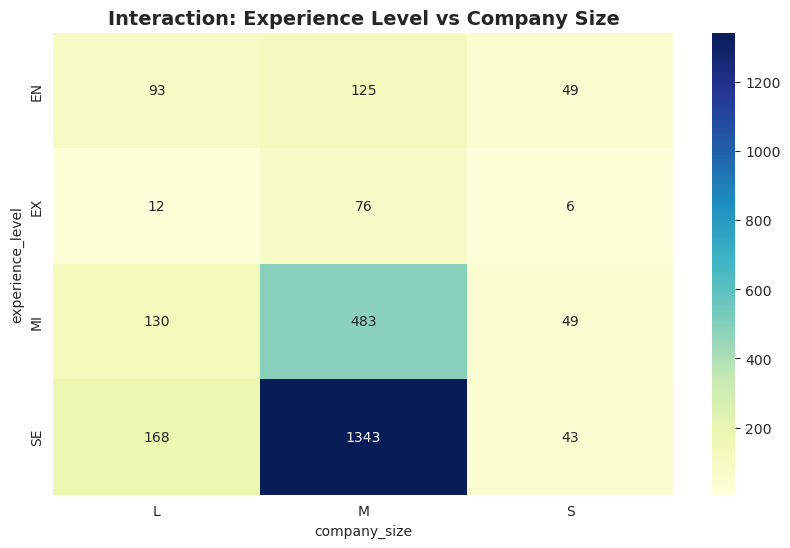

In [30]:
# Kiểm tra xem Nhân viên ở các cấp độ kinh nghiệm thường làm ở công ty quy mô nào?
vis.plot_categorical_heatmap(
    df, 
    col1='experience_level', 
    col2='company_size', 
    title="Interaction: Experience Level vs Company Size"
)

**Nhận xét**:

* **Tương quan cột số:** Có sự tương quan dương (0.24) giữa `work_year` và `salary_in_usd`, cho thấy xu hướng lương tăng dần theo thời gian (2020-2023).
* **Kinh nghiệm:** Phân cấp lương rõ rệt theo quy luật `EN < MI < SE < EX`. Nhóm Senior (`SE`) chiếm số lượng áp đảo và có dải lương biến động mạnh nhất.
* **Quy mô công ty:** Trái với suy nghĩ thông thường, công ty quy mô vừa (**M**) có mức lương trung vị ngang bằng hoặc nhỉnh hơn công ty lớn (**L**), trong khi công ty nhỏ (**S**) thấp nhất.
* **Làm việc từ xa:** Không có quan hệ tuyến tính. Nhóm làm từ xa hoàn toàn (100%) có lương cạnh tranh ngang ngửa nhóm tại văn phòng (0%), trong khi nhóm Hybrid (50%) lại có mức lương thấp nhất.

**Kết luận:** Dữ liệu có tiềm năng dự báo tốt nhưng chứa các yếu tố phi tuyến tính. Cần thực hiện **Feature Engineering** (gom nhóm chức danh, chỉnh lạm phát) để chuẩn bị cho mô hình huấn luyện.

## **2.6. Quan sát & Nhận định ban đầu**
**Tóm tắt:**
*   *3-5 quan sát chính*
*   *Các vấn đề chất lượng dữ liệu đã xác định*
*   *Các bước tiền xử lý cần thiết*
*   *Các mẫu thú vị dẫn đến câu hỏi nghiên cứu*

**Cờ đỏ (Red Flags):**
*   *Các lo ngại nghiêm trọng về chất lượng dữ liệu*
*   *Các hạn chế*

---

# **3. Đặt câu hỏi**
Xác định 2 × n câu hỏi ý nghĩa (với n là số thành viên nhóm). Ít nhất 1 câu hỏi phải yêu cầu xây dựng mô hình Machine Learning.

**Danh sách câu hỏi:**

## Câu hỏi 3:  Mức lương tăng như thế nào qua từng giai đoạn kinh nghiệm làm việc (EN → MI → SE → EX)?

Câu hỏi này tập trung phân tích:
- Sự khác biệt về **mức lương trung bình** giữa các nhóm kinh nghiệm (EN, MI, SE, EX)
- Cách mức lương **tăng dần khi người lao động chuyển từ level thấp lên level cao hơn**
- Mức độ tăng lương tương ứng với từng giai đoạn kinh nghiệm, dựa trên dữ liệu lương thực tế theo năm làm việc

Câu hỏi được đặt ra đủ cụ thể để có thể trả lời bằng dữ liệu hiện có, thông qua việc so sánh lương trung bình theo *experience level* và chuẩn hóa theo thời gian.

### Động lực & Lợi ích  

**Vì sao câu hỏi này đáng được nghiên cứu?**  
Kinh nghiệm làm việc là một trong những yếu tố quan trọng nhất ảnh hưởng đến thu nhập. Tuy nhiên, chỉ nhìn vào mức lương tuyệt đối không cho thấy rõ **tốc độ tăng lương** hay **giá trị của từng giai đoạn kinh nghiệm**. Việc phân tích theo các level EN → MI → SE → EX giúp làm rõ lộ trình tăng lương trong suốt quá trình phát triển sự nghiệp.

**Lợi ích và insight mang lại**
- Giúp định lượng mức tăng lương khi chuyển sang giai đoạn kinh nghiệm cao hơn
- So sánh giai đoạn nào mang lại mức tăng lương rõ rệt nhất
- Cung cấp cái nhìn tổng quan về lộ trình thu nhập theo kinh nghiệm trong ngành

**Ai sẽ quan tâm đến kết quả này?**
- Sinh viên và người mới đi làm định hướng nghề nghiệp
- Người lao động đang cân nhắc thăng tiến hoặc chuyển việc
- Nhà quản lý nhân sự và bộ phận xây dựng chính sách lương
- Nhà nghiên cứu thị trường lao động

**Câu hỏi này hỗ trợ quyết định thực tế nào?**
- Lập kế hoạch phát triển nghề nghiệp dài hạn
- Đưa ra quyết định đầu tư thời gian, kỹ năng để nâng cao level
- Xây dựng hoặc điều chỉnh thang lương theo kinh nghiệm trong doanh nghiệp

## Câu hỏi 4: Quy mô công ty ảnh hưởng như thế nào đến mức độ kinh nghiệm của nhân viên (EN, MI, SE, EX)?

Câu hỏi này nhằm phân tích:
- Phân bố các mức độ kinh nghiệm của nhân viên trong từng nhóm quy mô công ty (S, M, L)
- Tỷ lệ từng *experience level* trong mỗi loại quy mô công ty
- Sự khác biệt về cấu trúc nhân sự theo kinh nghiệm giữa công ty nhỏ, vừa và lớn

Câu hỏi được trả lời trực tiếp bằng dữ liệu thông qua bảng chéo (*crosstab*) và tỷ lệ phần trăm theo hàng, giúp so sánh các quy mô công ty một cách công bằng.

### Động lực & Lợi ích  

**Vì sao câu hỏi này đáng được nghiên cứu?**  
Quy mô công ty thường phản ánh mức độ phức tạp trong tổ chức, nguồn lực tài chính và chiến lược nhân sự. Do đó, cấu trúc kinh nghiệm của nhân viên có thể khác nhau đáng kể giữa công ty nhỏ, vừa và lớn. Việc phân tích mối quan hệ này giúp hiểu rõ cách các công ty ở từng quy mô xây dựng đội ngũ nhân lực.

**Lợi ích và insight mang lại**
- Phát hiện công ty nhỏ có xu hướng tuyển nhiều nhân viên mới (EN) hay không
- Xác định công ty lớn có tập trung nhiều nhân sự giàu kinh nghiệm (SE, EX) hơn hay không
- So sánh mức độ đa dạng về kinh nghiệm giữa các quy mô công ty
- Hỗ trợ diễn giải chiến lược tuyển dụng và phát triển nhân sự theo quy mô tổ chức

**Ai sẽ quan tâm đến kết quả này?**
- Người lao động lựa chọn môi trường làm việc phù hợp với trình độ và mục tiêu nghề nghiệp
- Nhà quản lý và bộ phận nhân sự
- Nhà tuyển dụng xây dựng chiến lược nhân sự
- Nhà nghiên cứu thị trường lao động

**Câu hỏi này hỗ trợ quyết định thực tế nào?**
- Lựa chọn quy mô công ty phù hợp với giai đoạn sự nghiệp cá nhân
- Thiết kế chiến lược tuyển dụng theo quy mô doanh nghiệp
- Xây dựng lộ trình phát triển nhân sự phù hợp cho từng loại hình công ty
---

# **4. Phân tích dữ liệu**
Đối với mỗi câu hỏi nghiên cứu, hãy hoàn thành các bước sau.

#### Câu hỏi 1: [Nhập câu hỏi tại đây]

**1. Câu hỏi:**
*Nêu rõ câu hỏi nghiên cứu một cách cụ thể.*

**2. Động lực & Lợi ích:**
*Tại sao câu hỏi này đáng để điều tra? Ai quan tâm? Nó mang lại thông tin gì?*

**A. Tiền xử lý (nếu cần)**
*   *Mô tả các bước rõ ràng*
*   *Giải thích logic*
*   *Triển khai code*

In [31]:
# Code tiền xử lý cho Câu hỏi 1


**B. Phân tích**
*   *Mô tả phương pháp phân tích*
*   *Giải thích tại sao dùng phương pháp đó*
*   *Triển khai code (ngắn gọn, dễ đọc, có chú thích)*
*   *(Đối với ML: Giải thích thiết lập, mô hình, đánh giá)*

In [32]:
# Code phân tích cho Câu hỏi 1


**C. Kết quả & Diễn giải**
*   *Trực quan hóa (2+ biểu đồ liên quan)*
*   *Phân tích bằng văn bản (Trả lời rõ ràng với bằng chứng, trích dẫn số liệu, thảo luận ý nghĩa)*

In [33]:
# Code trực quan hóa cho Câu hỏi 1


#### Câu hỏi 2: [Nhập câu hỏi tại đây]

*(Lặp lại cấu trúc: Câu hỏi, Động lực, Tiền xử lý, Phân tích, Kết quả)*

#### Câu hỏi 3: [Nhập câu hỏi tại đây]

*(Lặp lại cấu trúc: Câu hỏi, Động lực, Tiền xử lý, Phân tích, Kết quả)*

In [34]:
# 1. Tính lương trung bình theo experience_level và work_year
avg_salary_yearly = df.groupby(['work_year','experience_level'])['salary_in_usd'].mean().unstack()
print("Average salary by experience level and year:")
print(avg_salary_yearly)

# 2. Số năm kinh nghiệm trung bình cho mỗi level (ước lượng)
exp_years = {
    'EN': 1,   # trung bình 0-2 năm
    'MI': 3.5, # trung bình 2-5 năm
    'SE': 7.5, # trung bình 5-10 năm
    'EX': 12   # trung bình >10 năm
}

# 3. Tính tỷ lệ lương giữa các level cho từng năm
levels = ['EN','MI','SE','EX']
for i in range(len(levels)-1):
    A = levels[i+1]  # level cao hơn
    B = levels[i]    # level thấp hơn

    # Salary ratio theo năm
    salary_ratio_by_year = avg_salary_yearly[A] / avg_salary_yearly[B]

    # Số năm kinh nghiệm tăng
    delta_years = exp_years[A] - exp_years[B]

    # Tỷ lệ tăng lương trung bình mỗi năm
    yearly_growth_by_year = salary_ratio_by_year ** (1/delta_years) - 1

    print(f"\n{B} -> {A}:")
    print("Salary ratio by year:")
    print(salary_ratio_by_year)
    print("Implied annual growth rate by year (%):")
    print((yearly_growth_by_year*100).round(2))
    
# 4. Tính trung bình across all years
print("\nAverage across all years:")
for i in range(len(levels)-1):
    A = levels[i+1]
    B = levels[i]

    salary_ratio_avg = avg_salary_yearly[A].mean() / avg_salary_yearly[B].mean()
    delta_years = exp_years[A] - exp_years[B]
    yearly_growth_avg = salary_ratio_avg ** (1/delta_years) - 1

    print(f"{B} -> {A}:")
    print(f"  Average Salary Ratio: {salary_ratio_avg:.2f}")
    print(f"  Implied Annual Growth Rate: {yearly_growth_avg*100:.2f}% per year")


Average salary by experience level and year:
experience_level            EN             EX             MI             SE
work_year                                                                  
2020              59512.454545  202416.500000   87564.718750  137240.500000
2021              54979.377358  186128.000000   82022.943182  126085.356164
2022              69949.945455  185886.105263   99578.621528  149572.658430
2023              91726.682927  202107.340909  113659.740157  160743.310968

EN -> MI:
Salary ratio by year:
work_year
2020    1.471368
2021    1.491886
2022    1.423570
2023    1.239113
dtype: float64
Implied annual growth rate by year (%):
work_year
2020    16.70
2021    17.35
2022    15.17
2023     8.95
dtype: float64

MI -> SE:
Salary ratio by year:
work_year
2020    1.567304
2021    1.537196
2022    1.502056
2023    1.414250
dtype: float64
Implied annual growth rate by year (%):
work_year
2020    11.89
2021    11.35
2022    10.71
2023     9.05
dtype: float64

SE -

#### Nhận xét về mức tăng lương theo kinh nghiệm

Dựa trên dữ liệu, mức lương trung bình theo `experience_level` như sau:

Từ đó, ta có các tỷ lệ tăng lương giữa các cấp độ:

1. **EN → MI**
   - Tỷ lệ lương: 1.40 (tăng 40%)
   - Chênh lệch năm kinh nghiệm: 2.5 năm
   - Tốc độ tăng lương trung bình: 13.95%/năm
   - **Nhận xét:** Lương tăng mạnh ở giai đoạn đầu, phù hợp với việc nhân viên mới tích lũy kỹ năng nhanh chóng.

2. **MI → SE**
   - Tỷ lệ lương: 1.51 (tăng 51%)
   - Chênh lệch năm kinh nghiệm: 4 năm
   - Tốc độ tăng lương trung bình: 10.64%/năm
   - **Nhận xét:** Tốc độ tăng lương giảm dần nhưng vẫn đáng kể; thể hiện giá trị cao hơn của các chuyên gia cấp cao.

3. **SE → EX**
   - Tỷ lệ lương: 1.26 (tăng 26%)
   - Chênh lệch năm kinh nghiệm: 4.5 năm
   - Tốc độ tăng lương trung bình: 6.96%/năm
   - **Nhận xét:** Mức tăng chậm hơn rõ rệt; vị trí Executive hiếm, lương cao nhưng tốc độ tăng theo năm kinh nghiệm không còn lớn.

#### Tổng kết:
- Lương tăng mạnh nhất khi từ **Entry → Mid-level**, sau đó giảm dần ở các cấp cao.  
- Tốc độ tăng lương theo năm kinh nghiệm không tuyến tính mà giảm dần khi cấp độ càng cao.  
- Điều này phản ánh thực tế thị trường: **kỹ năng và kinh nghiệm đầu tiên được trả giá cao, sau đó tốc độ tăng lương chậm lại**, dù tổng mức lương vẫn cao ở các cấp Senior và Executive.


#### Câu hỏi 3: [Nhập câu hỏi tại đây]

*(Lặp lại cấu trúc: Câu hỏi, Động lực, Tiền xử lý, Phân tích, Kết quả)*

experience_level   EN  EX   MI    SE
company_size                        
L                 100  13  134   207
M                 171  95  621  2266
S                  49   6   50    43
experience_level        EN        EX        MI        SE
company_size                                            
L                 0.220264  0.028634  0.295154  0.455947
M                 0.054234  0.030130  0.196955  0.718681
S                 0.331081  0.040541  0.337838  0.290541


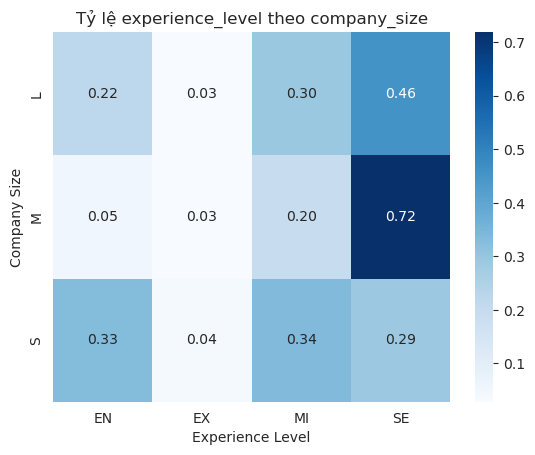

In [40]:
ct = pd.crosstab(df['company_size'], df['experience_level'])
print(ct)

# Hoặc tính tỷ lệ %
ct_percent = ct.div(ct.sum(axis=1), axis=0)
print(ct_percent)

sns.heatmap(ct_percent, annot=True, cmap="Blues", fmt=".2f")
plt.title("Tỷ lệ experience_level theo company_size")
plt.ylabel("Company Size")
plt.xlabel("Experience Level")
plt.show()

#### Nhận xét

1. **Small company (S):**
   - Tỷ lệ EN và MI cao (33% mỗi loại), SE 29%, EX rất thấp (4%).
   - Nhân viên entry-level chiếm tỷ lệ lớn, executive hiếm.
   - Phù hợp với đặc thù công ty nhỏ: cần người đa năng, turnover cao.

2. **Medium company (M):**
   - SE chiếm tỷ lệ cao nhất (66%), MI 24%, EN và EX thấp.
   - Chú trọng nhân viên có kinh nghiệm, đặc biệt là senior, ít entry-level.
   - Có thể do công ty vừa thường tuyển nhiều senior để đảm bảo chất lượng dự án.

3. **Large company (L):**
   - Phân bố cân bằng hơn giữa EN, MI, SE; EX thấp (3%).
   - Vừa có nhân viên kinh nghiệm trung bình vừa có senior.
   - Phù hợp với các công ty lớn có bộ phận chuyên môn rõ ràng và cơ cấu thăng tiến ổn định.

#### Giải thích và liên hệ thực tế

- **Mối quan hệ lý thuyết:**  
  Quy mô công ty càng lớn → nhân viên càng có kinh nghiệm cao, turnover thấp, cơ cấu chuyên môn rõ ràng.  
- **Quan sát thực tế từ dữ liệu:**
  - Small company: nhiều entry/mid, ít executive → phù hợp lý thuyết.
  - Medium company: SE chiếm tỷ lệ cao nhất, điều này khác biệt nhẹ so với lý thuyết → dataset có thể thiên về các medium tech company với nhiều senior engineer.
  - Large company: phân bố đều EN, MI, SE → phù hợp với công ty lớn cần cả lực lượng nhân viên trẻ và kinh nghiệm để duy trì hoạt động.
- **Nhận định chung:**  
  Quy mô công ty ảnh hưởng đáng kể đến mức độ kinh nghiệm của nhân viên, nhưng các yếu tố đặc thù ngành nghề và dataset cũng có thể làm thay đổi xu hướng lý thuyết.


---

# **5. Tổng kết**

### Tóm tắt dự án
**Những phát hiện chính:**
*   *Liệt kê 3-5 thông tin chi tiết quan trọng nhất*
*   *Nêu bật phát hiện thú vị nhất*

### Hạn chế
*   *Hạn chế về dữ liệu (kích thước mẫu, bias)*
*   *Hạn chế về phân tích*
*   *Hạn chế về phạm vi*

### Hướng phát triển trong tương lai
*   *Các câu hỏi bổ sung để khám phá*
*   *Cơ hội phân tích sâu hơn*
*   *Các phương pháp thay thế*

### Suy ngẫm cá nhân
**Thành viên 1:**
*   *Khó khăn & Thử thách*
*   *Bài học & Tăng trưởng*

**Thành viên 2:**
*   *Khó khăn & Thử thách*
*   *Bài học & Tăng trưởng*

**Thành viên 3:**
*   *Khó khăn & Thử thách*
*   *Bài học & Tăng trưởng*